# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)

## setup

### Import libraries

In [123]:
import pandas as pd
import numpy as np
import os
import json

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [93]:
os.listdir(merged_data_path)

['merged_tweets.csv', 'merged_users.csv']

In [94]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [95]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [96]:
users.set_index('id', inplace = True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [97]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(169574, 168362)

In [100]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,...,0,0,0,0,0,0,0,0,0.000000e+00,0
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,...,https://t.co/uMfikCmd0I,0,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521733011414257664,1521733011414257664,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,...,0,0,0,0,0,0,0,0,0.000000e+00,0
1521733010504445954,1521733010504445954,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,...,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,...,0,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521147763861626881,1521147763861626881,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟨🟨🟩⬜⬜\r\n🟩🟩🟩⬜🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2988248106,...,0,"2015年初ブルベ．'16,'17,'18,'19 SR．PBP2019 完走",https://pbs.twimg.com/profile_images/137075911...,Japan,False,a143753,False,0,0.000000e+00,0
1521147762296852480,1521147762296852480,everyone,ja,"{'urls': [{'start': 36, 'end': 59, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 3/10\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛⬛⬛⬛🟨\r\n🟩🟩🟩🟩🟩...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2992397222,...,https://t.co/Egk7FhvO32,2013/3/27に終了を迎えたMMORPG「コンチェルトゲート フォルテ」の世界で暮らして...,https://pbs.twimg.com/profile_images/150356943...,シルト＠ハウト密林地帯,False,nirutanmaiwaifu,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.035905e+18,0
1521147759276871680,1489218054957387779,everyone,ca,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle (ES) #116 5/6\r\n\r\n🟨⬜⬜⬜⬜\r\n🟩⬜🟨⬜🟨\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",33579533,...,0,De sangre altiva y noble corazón.,https://pbs.twimg.com/profile_images/151652867...,"Santiago - Quirihue, Chile",False,GCrisostomoT,False,0,1.449118e+18,0


In [149]:
tudf.iloc[0]['text']

'Wordle (ES)  #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n https://t.co/oJCukg4JnD'

In [153]:
print('\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n')


⬜⬜🟨🟩⬜
⬜⬜🟨🟩⬜
⬜⬜⬜🟩🟩
⬜🟩⬜🟩🟩
🟩🟩🟩🟩🟩



In [101]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118444 entries, 1521733018293084160 to 1521147753862033408
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       118444 non-null  int64  
 1   reply_settings        118444 non-null  object 
 2   lang                  118444 non-null  object 
 3   entities_tweet        118444 non-null  object 
 4   possibly_sensitive    118444 non-null  bool   
 5   source                118444 non-null  object 
 6   public_metrics_tweet  118444 non-null  object 
 7   text                  118444 non-null  object 
 8   context_annotations   118444 non-null  object 
 9   author_id             118444 non-null  int64  
 10  created_at            118444 non-null  object 
 11  referenced_tweets     118444 non-null  object 
 12  in_reply_to_user_id   118444 non-null  float64
 13  attachments           118444 non-null  object 
 14  geo                  

In [102]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [103]:
tudf.iloc[-1]

conversation_id                                       1521147753862033408
reply_settings                                                   everyone
lang                                                                   ko
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                    Wordle 318 5/6\r\n\r\n⬛🟨🟩🟨⬛\r\n⬛🟩🟩🟩🟩\r\n⬛🟩🟩🟩🟩\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                        55866913
created_at                                      2022-05-02 15:21:00+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [104]:
tudf.iloc[-2]

conversation_id                                       1521147754541723648
reply_settings                                                   everyone
lang                                                                   en
entities_tweet          {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
possibly_sensitive                                                  False
source                                                Twitter for Android
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                    Wordle (ES)  #116 5/6\r\n\r\n🟨⬜⬜⬜⬜\r\n⬜🟨⬜🟨🟨\r\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                              864482058604818433
created_at                                      2022-05-02 15:21:00+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [105]:
tudf.iloc[-1]['withheld_tweet']

0

In [106]:
tudf.iloc[-2]['withheld_tweet']

0

In [107]:
tudf.iloc[-1]['withheld_tweet'] == tudf.iloc[-2]['withheld_tweet']

True

It looks like a lot of the tweets are duplicated because merges and drop_duplicates don't consider NaN == NaN. For example, `tudf.iloc[-1, 'withheld_tweet']` and `tudf.iloc[-2, 'withheld_tweet]` are both null, but they are not considered equal to each other.

In [108]:
#fast and loose fillna for dropping duplicates
tudf.fillna(0, inplace=True)

In [110]:
tudf.drop_duplicates(inplace=True)
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118444 entries, 1521733018293084160 to 1521147753862033408
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       118444 non-null  int64  
 1   reply_settings        118444 non-null  object 
 2   lang                  118444 non-null  object 
 3   entities_tweet        118444 non-null  object 
 4   possibly_sensitive    118444 non-null  bool   
 5   source                118444 non-null  object 
 6   public_metrics_tweet  118444 non-null  object 
 7   text                  118444 non-null  object 
 8   context_annotations   118444 non-null  object 
 9   author_id             118444 non-null  int64  
 10  created_at            118444 non-null  object 
 11  referenced_tweets     118444 non-null  object 
 12  in_reply_to_user_id   118444 non-null  float64
 13  attachments           118444 non-null  object 
 14  geo                  

In [111]:
tudf.tail()

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521147763861626881,1521147763861626881,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟨🟨🟩⬜⬜\r\n🟩🟩🟩⬜🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2988248106,...,0,"2015年初ブルベ．'16,'17,'18,'19 SR．PBP2019 完走",https://pbs.twimg.com/profile_images/137075911...,Japan,False,a143753,False,0,0.000000e+00,0
1521147762296852480,1521147762296852480,everyone,ja,"{'urls': [{'start': 36, 'end': 59, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 3/10\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛⬛⬛⬛🟨\r\n🟩🟩🟩🟩🟩...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2992397222,...,https://t.co/Egk7FhvO32,2013/3/27に終了を迎えたMMORPG「コンチェルトゲート フォルテ」の世界で暮らして...,https://pbs.twimg.com/profile_images/150356943...,シルト＠ハウト密林地帯,False,nirutanmaiwaifu,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.035905e+18,0
1521147759276871680,1489218054957387779,everyone,ca,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle (ES) #116 5/6\r\n\r\n🟨⬜⬜⬜⬜\r\n🟩⬜🟨⬜🟨\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",33579533,...,0,De sangre altiva y noble corazón.,https://pbs.twimg.com/profile_images/151652867...,"Santiago - Quirihue, Chile",False,GCrisostomoT,False,0,1.449118e+18,0
1521147754541723648,1521147754541723648,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #116 5/6\r\n\r\n🟨⬜⬜⬜⬜\r\n⬜🟨⬜🟨🟨\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",864482058604818433,...,0,0,0,0,0,0,0,0,0.000000e+00,0
1521147753862033408,1521147753862033408,everyone,ko,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛🟨🟩🟨⬛\r\n⬛🟩🟩🟩🟩\r\n⬛🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",55866913,...,https://t.co/BMgipHt11Y,사람사는세상🎗,https://pbs.twimg.com/profile_images/150885920...,"Seoul, Korea",False,diplolee,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0


---
---
## Basic EDA

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [161]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [138]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

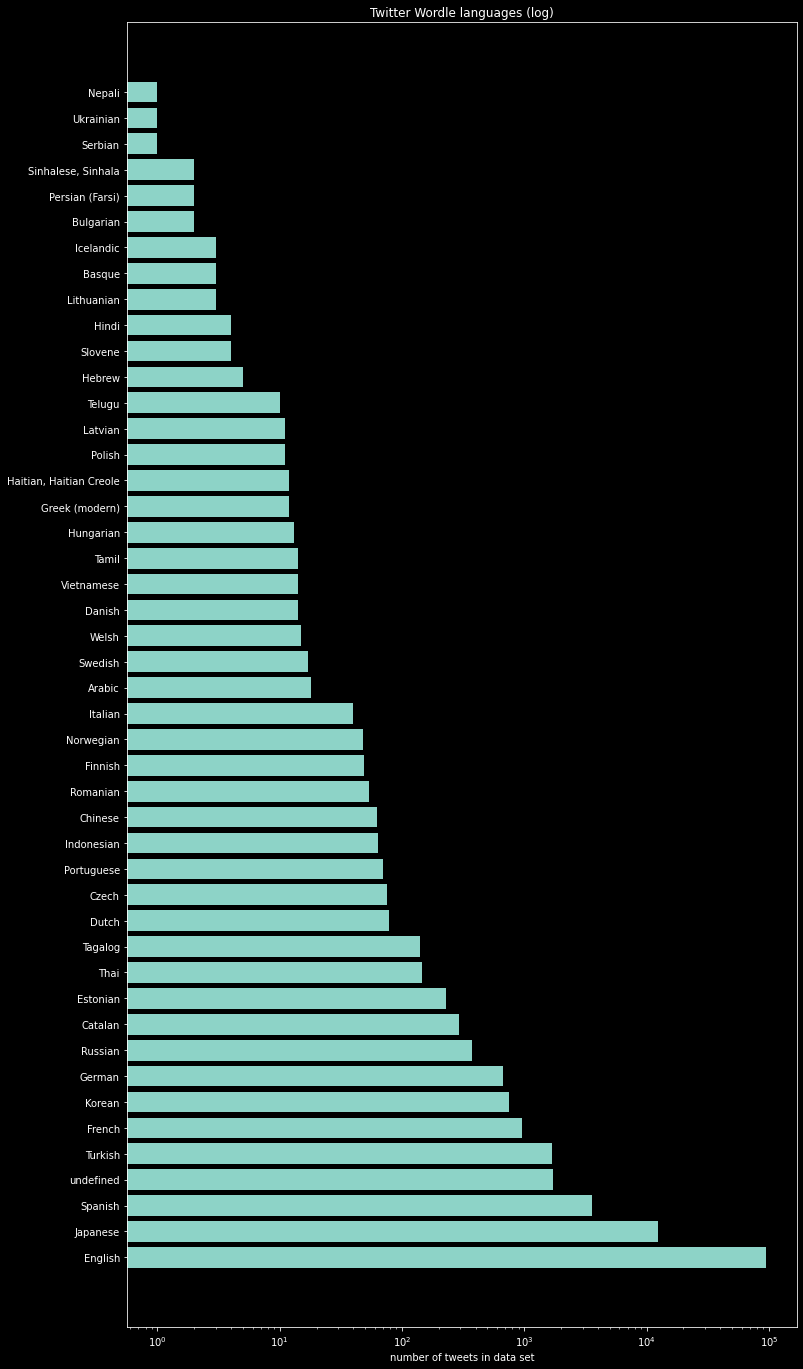

In [170]:
#plot languages
lang_vcs = tudf['lang'].value_counts()
lang_vcs_names = [
     lang_dict[lang]['name']
     for lang in lang_vcs.index
]
plt.figure(figsize=(12,24))
plt.barh(width=lang_vcs, y=lang_vcs_names, log = True)
plt.title('Twitter Wordle languages (log)')
plt.xlabel("number of tweets in data set");

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [180]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

10853

In [182]:
is_reply.sum()/len(tudf)

0.09162979973658437

about 9% of these tweets are in reply to another tweet.

---
###  reply_settings


In [185]:
tudf['reply_settings'].value_counts()

everyone          117934
following            283
mentionedUsers       227
Name: reply_settings, dtype: int64

### entities_tweet

These were `entities` in the tweets data. Entities 

In [193]:
tudf['entities_tweet']

tweet_id
1521733018293084160    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521733015738662913    {'urls': [{'start': 58, 'end': 81, 'url': 'htt...
1521733011414257664                                                    0
1521733010504445954                                                    0
1521733001981444096    {'mentions': [{'start': 0, 'end': 12, 'usernam...
                                             ...                        
1521147763861626881                                                    0
1521147762296852480    {'urls': [{'start': 36, 'end': 59, 'url': 'htt...
1521147759276871680    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521147754541723648    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521147753862033408                                                    0
Name: entities_tweet, Length: 118444, dtype: object

In [233]:
#what are the unique entities?
[
    json.loads(entity.replace("'", '"'))
    for entity in tudf['entities_tweet']
    if type(entity) == str
]

JSONDecodeError: Expecting ',' delimiter: line 1 column 263 (char 262)

In [239]:
json.loads(tudf.iloc[1]['entities_tweet'].replace("'", '"'))

{'urls': [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}

In [226]:
ok ="{'urls':[{'start': 58, 'end': 81, 'url': 'https://t.co/ifnVQsE6bO', 'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html', 'display_url': 'wordle.danielfrg.com/ciencia/index.…', 'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig', 'width': 1200, 'height': 630}, {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150', 'width': 150, 'height': 150}], 'status': 200, 'title': 'Un juego de palabras diario', 'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.', 'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}"

In [227]:
json.loads(ok.replace("'", '"'))

{'urls': [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}